In [180]:
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline
#import used_funtions_2 as uf 
import sys
sys.path.insert(1, '/bettik/boudaose/FINAL_SCRIPTS/') 
import USED_FUNCTIONS_2 as uf


In [181]:
repo = "/home/boudaose/23_mai/Chambery/"

In [182]:
%%time

#LColors = [ 1, 12, 18, 23, 24, 26] #, 41] #, 40 ] 
#LColors = [ 1, 12, 18, 23, 24, 41] #, 41] #, 40 ] 
LColors = [ 2, 12, 18, 23, 24, 41] #, 41] #, 40 ] 

L_nan  = [] 
LCo    = [] 
Llen   = [] 
scount = 0 

n = 6000
for col in LColors : 
    LlenLoc = 0
    for i in range( n ) : 
        # Load the TopLeft list 
        try :
            color, Pxl = col , i
            title = str(f'Color {color}, Pixel {Pxl}, On {60} dates').replace(' ','_') 
            filename = f"{repo}Label_{color}/Coherence_{color}/"+f'Coherence_Matrix_{title}.mat' 
            #filename = f"Label_{color}/Coherence_{color}/"+f'Covariance_Matrix_{title}.mat' 
            #filename = f"Label_{color}/Coherence_{color}/"+f'CovarianceA_Matrix_{title}.mat' 
            with open( filename, 'rb') as f:
                Matr = np.load(f) 
            if ( np.isnan( np.sum(Matr) )) : 
                L_nan.append( i ) 
            scount += 1 
            LCo.append( col ) 
            LlenLoc += 1 
        except :
            break
    Llen.append( LlenLoc )

print( "NbDataGlobal :", scount , 
 "\n", "LCo          :", list(set(LCo)), 
 "\n", "NbDataLocal  :", Llen, 
 "\n", "Lnan         :", L_nan ) 

# on the whole matrix
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Donnees = np.zeros( ( sum(Llen), Matr.shape[0], Matr.shape[1]) ) # one channel
Donnees_ts = np.zeros( ( sum(Llen), Matr.shape[0], Matr.shape[1]) ) # one channel
Legends = []
Legends_ts = []

IDs    = [] # Keys
ColPix = [] # Pair Of Values
IDs_ts    = [] # Keys
ColPix_ts = [] # Pair Of Values

coords = [] 
coords_ts = [] 

s  = 0 # train
s2 = 0 # test
for clr in LColors : 
    #-------------------------------
    filename = f"{repo}Label_{clr}/Coordinates_XY_{clr}"
    with open( filename, 'rb') as f:
        a = np.load(f) 
    #-------------------------------
    compt = 0
    print("Color :", clr, "Shape :", a.shape) 
    print("s1:", s)
    for d in range( 0, int(a.shape[0]*(40/100)) ) : 
        try :
            if (d in L_nan) : 
                compt+=1 # Count 'nan' and 'non-nan'
                pass
            else :
                # Load the TopLeft list
                color, Pxl = clr , d 
                title = str(f'Color {color}, Pixel {Pxl}, On {60} dates').replace(' ','_') 
                filename = f"{repo}Label_{color}/Coherence_{color}/"+f'Coherence_Matrix_{title}.mat' 
                #filename = f"Label_{color}/Coherence_{color}/"+f'Covariance_Matrix_{title}.mat' 
                #filename = f"Label_{color}/Coherence_{color}/"+f'CovarianceA_Matrix_{title}.mat' 
                with open( filename, 'rb') as f: 
                    Matr = np.load(f) 
                Donnees[ s ,:,:] = Matr 
                indx = LColors.index(color) 
                Legends.append( indx ) 
                IDs.append( s ) 
                #ColPix.append( [ indx, Pxl ] ) 
                ColPix.append( [ indx, Pxl, compt, a[compt] ] ) 
                coords.append( a[compt] ) 
                s+=1
                compt+=1 # Count 'nan' and 'non-nan'
            #compt+=1 # Count 'nan' and 'non-nan'
            
        except : 
            break
    print("s1:", s)
    print("s2:", s2)
    for d in range( int(a.shape[0]*(40/100)), int(a.shape[0]*(80/100)) ) : 
        try :
            if (d in L_nan) : 
                compt+=1 # Count 'nan' and 'non-nan'
                pass
            else :
                # Load the TopLeft list
                color, Pxl = clr , d 
                title = str(f'Color {color}, Pixel {Pxl}, On {60} dates').replace(' ','_') 
                filename = f"{repo}Label_{color}/Coherence_{color}/"+f'Coherence_Matrix_{title}.mat' 
                #filename = f"Label_{color}/Coherence_{color}/"+f'Covariance_Matrix_{title}.mat' 
                #filename = f"Label_{color}/Coherence_{color}/"+f'CovarianceA_Matrix_{title}.mat' 
                with open( filename, 'rb') as f: 
                    Matr = np.load(f) 
                Donnees_ts[ s2 ,:,:] = Matr 
                indx = LColors.index(color) 
                Legends_ts.append( indx ) 
                #IDs.append( s2 ) 
                IDs_ts.append( s2 ) 
                #ColPix.append( [ indx, Pxl ] ) 
                ColPix_ts.append( [ indx, Pxl, compt, a[compt] ] ) 
                coords_ts.append( a[compt] ) 
                s2+=1
                compt+=1 # Count 'nan' and 'non-nan'
            #compt+=1 # Count 'nan' and 'non-nan'
        except : 
            break
    print("s2:", s2)
    print("s1:", s)
    for d in range( int(a.shape[0]*(80/100)), a.shape[0] ) : 
        try :
            if (d in L_nan) : 
                compt+=1 # Count 'nan' and 'non-nan'
                pass
            else :
                # Load the TopLeft list
                color, Pxl = clr , d 
                title = str(f'Color {color}, Pixel {Pxl}, On {60} dates').replace(' ','_') 
                filename = f"{repo}Label_{color}/Coherence_{color}/"+f'Coherence_Matrix_{title}.mat' 
                #filename = f"Label_{color}/Coherence_{color}/"+f'Covariance_Matrix_{title}.mat' 
                #filename = f"Label_{color}/Coherence_{color}/"+f'CovarianceA_Matrix_{title}.mat' 
                with open( filename, 'rb') as f: 
                    Matr = np.load(f) 
                Donnees[ s ,:,:] = Matr 
                indx = LColors.index(color) 
                Legends.append( indx ) 
                IDs.append( s ) 
                #ColPix.append( [ indx, Pxl ] ) 
                ColPix.append( [ indx, Pxl, compt, a[compt] ] ) 
                coords.append( a[compt] ) 
                s+=1
                compt+=1 # Count 'nan' and 'non-nan'
            #compt+=1 # Count 'nan' and 'non-nan'
        except : 
            break
    print("s1:", s)



NbDataGlobal : 31575 
 LCo          : [2, 41, 12, 18, 23, 24] 
 NbDataLocal  : [6000, 1575, 6000, 6000, 6000, 6000] 
 Lnan         : []
Color : 2 Shape : (6000, 2)
s1: 0
s1: 2400
s2: 0
s2: 2400
s1: 2400
s1: 3600
Color : 12 Shape : (1575, 2)
s1: 3600
s1: 4230
s2: 2400
s2: 3030
s1: 4230
s1: 4545
Color : 18 Shape : (6000, 2)
s1: 4545
s1: 6945
s2: 3030
s2: 5430
s1: 6945
s1: 8145
Color : 23 Shape : (6000, 2)
s1: 8145
s1: 10545
s2: 5430
s2: 7830
s1: 10545
s1: 11745
Color : 24 Shape : (6000, 2)
s1: 11745
s1: 14145
s2: 7830
s2: 10230
s1: 14145
s1: 15345
Color : 41 Shape : (6000, 2)
s1: 15345
s1: 17745
s2: 10230
s2: 12630
s1: 17745
s1: 18945
CPU times: user 16.2 s, sys: 3.53 s, total: 19.7 s
Wall time: 2min 42s


In [183]:
print("Train:", len(coords), "Test:",len(coords_ts))

Train: 18945 Test: 12630


{0, 1, 2, 3, 4, 5}
[0, 0, 0, array([19085,  9016])]
(18945, 60, 60) 18945 18945
(15156, 3600) (15156,)


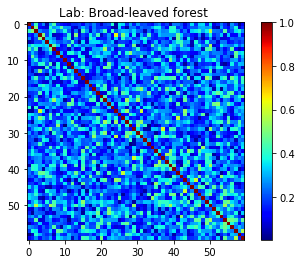

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.008, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       724
           1       0.85      0.70      0.77       208
           2       0.72      0.64      0.68       719
           3       0.63      0.74      0.68       714
           4       0.86      0.85      0.85       720
           5       0.88      0.97      0.92       704

   micro avg       0.79      0.79      0.79      3789
   macro avg       0.80      0.78      0.79      3789
weighted avg       0.80      0.79      0.79      3789




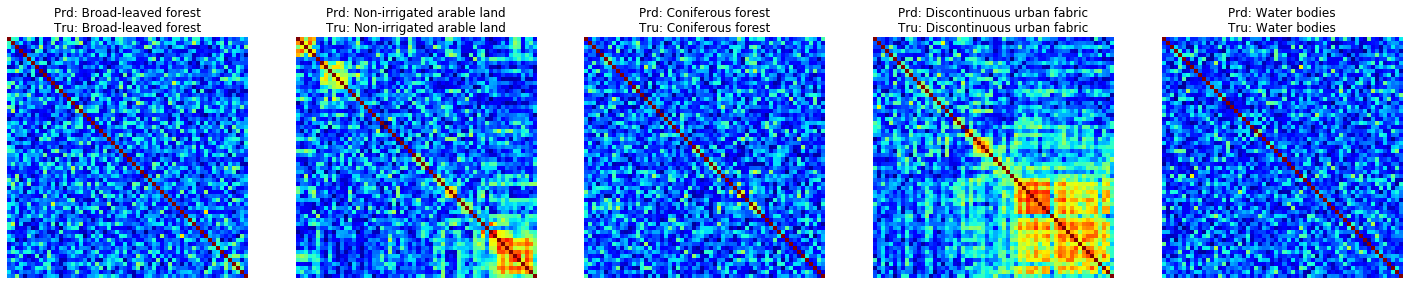

In [185]:
cas = "train_validation" # or "test" if test case of use

if cas=="test" : 
    zip_iterator_ts = zip(IDs_ts, ColPix_ts) 
    a_dictionary_ts = dict(zip_iterator_ts) 
    The_Images = Donnees_ts[:len(coords_ts)]
    print(set(Legends_ts)) 
    print(a_dictionary_ts[0])

    print(The_Images.shape, len(Legends_ts) , len(ColPix_ts))
    #---------------------------------------------------------------
    N_SAMPLES = len( The_Images ) 
    DATA = The_Images.reshape(( N_SAMPLES, -1 )) 
    #---------------------------------------------------------------
    _, X_TEST, _, y_TEST = train_test_split( DATA, 
                                             Legends_ts, 
                                             test_size=1.0 , 
                                             shuffle=False ) 
    #---------------------------------------------------------------
    Legends_ts = np.array(Legends_ts[:]) 
    #---------------------------------------------------------------

elif cas=="train_validation" : 
    zip_iterator = zip(IDs, ColPix) 
    a_dictionary = dict(zip_iterator) 
    The_Images = Donnees[:len(coords)]
    print(set(Legends)) 
    print(a_dictionary[0])

    print(The_Images.shape, len(Legends) , len(ColPix))
    #---------------------------------------------------------------
    N_SAMPLES = len( The_Images ) 
    DATA = The_Images.reshape(( N_SAMPLES, -1 )) 
    #---------------------------------------------------------------
    CLF = svm.SVC(gamma=0.008, shrinking=True) 
    X_TRAIN, X_VAL, y_TRAIN, y_VAL = train_test_split( DATA, 
                                                        Legends,
                                                        test_size=0.20 , 
                                                        shuffle=True ) 
    #---------------------------------------------------------------
    Legends = np.array(Legends[:]) 
    print(X_TRAIN.shape, np.array(y_TRAIN).shape) 
    #---------------------------------------------------------------

    # Testing that data is intact
    i = 150

    plt.imshow( X_TRAIN[i,:].reshape(1,60,60)[0] , cmap='jet') 
    plt.title( f"Lab: { uf.LabelsList()[ LColors[y_TRAIN[i]] ] } " )
    plt.colorbar() 
    plt.show() 
    #plt.cla()

    # Learn the digits on the train subset
    CLF.fit(X_TRAIN, y_TRAIN) 
    #---------------------------------------------------------------
    # Predict the value of the digit on the test subset
    PREDICTED = CLF.predict(X_VAL) 

    # Example
    _ , axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 25)) 
    #---------------------------------------------------------------
    for ax, image, prediction, clc in zip(axes, X_VAL, PREDICTED, y_VAL):
        ax.set_axis_off() 
        image = image.reshape(Matr.shape[0], Matr.shape[1]) 
        ax.imshow(image, cmap=plt.cm.jet, interpolation='nearest') 
        #ax.set_title(f'Prd: {prediction[:15]}\nTru: {tru[:15]}') 
        #ax.set_title(f'Prd: {prediction}\nTru: {tru}') 
        ax.set_title(f'Prd: {uf.LabelsList()[LColors[prediction]]}\nTru: {uf.LabelsList()[LColors[clc]]}') 

    # Report (see recall)
    #---------------------------------------------------------------
    print(f"Classification report for classifier {CLF}:\n"
          f"{metrics.classification_report( y_VAL, PREDICTED , )}\n")  
    #---------------------------------------------------------------


In [186]:
cas = "test" # "train_validation" or "test" according to the case of use

if cas=="test" : 
    zip_iterator_ts = zip(IDs_ts, ColPix_ts) 
    a_dictionary_ts = dict(zip_iterator_ts) 
    The_Images = Donnees_ts[:len(coords_ts)]
    print(set(Legends_ts)) 
    print(a_dictionary_ts[0])

    print(The_Images.shape, len(Legends_ts) , len(ColPix_ts))
    #---------------------------------------------------------------
    N_SAMPLES = len( The_Images ) 
    DATA = The_Images.reshape(( N_SAMPLES, -1 )) 
    #---------------------------------------------------------------
    _, X_TEST, _, y_TEST = train_test_split( DATA, 
                                             Legends_ts, 
                                             test_size=1.0 , 
                                             shuffle=False ) 
    #---------------------------------------------------------------
    Legends_ts = np.array(Legends_ts[:]) 
    #---------------------------------------------------------------

elif cas=="train_validation" : 
    zip_iterator = zip(IDs, ColPix) 
    a_dictionary = dict(zip_iterator) 
    The_Images = Donnees[:len(coords)]
    print(set(Legends)) 
    print(a_dictionary[0])

    print(The_Images.shape, len(Legends) , len(ColPix))
    #---------------------------------------------------------------
    N_SAMPLES = len( The_Images ) 
    DATA = The_Images.reshape(( N_SAMPLES, -1 )) 
    #---------------------------------------------------------------
    CLF = svm.SVC(gamma=0.008, shrinking=True) 
    X_TRAIN, X_VAL, y_TRAIN, y_VAL = train_test_split( DATA, 
                                                        Legends,
                                                        test_size=0.20 , 
                                                        shuffle=True ) 
    #---------------------------------------------------------------
    Legends = np.array(Legends[:]) 
    print(X_TRAIN.shape, np.array(y_TRAIN).shape) 
    #---------------------------------------------------------------

    # Testing that data is intact
    i = 150

    plt.imshow( X_TRAIN[i,:].reshape(1,60,60)[0] , cmap='jet') 
    plt.title( f"Lab: { uf.LabelsList()[ LColors[y_TRAIN[i]] ] } " )
    plt.colorbar() 
    plt.show() 
    #plt.cla()

    # Learn the digits on the train subset
    CLF.fit(X_TRAIN, y_TRAIN) 
    #---------------------------------------------------------------
    # Predict the value of the digit on the test subset
    PREDICTED = CLF.predict(X_VAL) 

    # Example
    _ , axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 25)) 
    #---------------------------------------------------------------
    for ax, image, prediction, clc in zip(axes, X_VAL, PREDICTED, y_VAL):
        ax.set_axis_off() 
        image = image.reshape(Matr.shape[0], Matr.shape[1]) 
        ax.imshow(image, cmap=plt.cm.jet, interpolation='nearest') 
        #ax.set_title(f'Prd: {prediction[:15]}\nTru: {tru[:15]}') 
        #ax.set_title(f'Prd: {prediction}\nTru: {tru}') 
        ax.set_title(f'Prd: {uf.LabelsList()[LColors[prediction]]}\nTru: {uf.LabelsList()[LColors[clc]]}') 

    # Report (see recall)
    #---------------------------------------------------------------
    print(f"Classification report for classifier {CLF}:\n"
          f"{metrics.classification_report( y_VAL, PREDICTED , )}\n")  
    #---------------------------------------------------------------


{0, 1, 2, 3, 4, 5}
[0, 2400, 2400, array([19653,  9296])]
(12630, 60, 60) 12630 12630


In [153]:
# If there is a new very performing model to save !!
"""
import pickle # to save the model 
model = CLF
filename = 'SVM_finalized_model_Vl81_Ts80_N6000_6Cl.sav' 
filename = str(f'SVM_finalized_model_Vl79_Ts78_N6000_6Cl_{LColors}.sav').replace(' ','_')
pickle.dump(model, open(filename, 'wb')) 
"""

In [155]:
"""
# Loading a trained model (svm)
import pickle # to save the model or load
# load the model from disk 
filename = 'SVM_finalized_model.sav' 
#filename = 'SVM_finalized_model_Vl81_Ts80_N6000_6Cl.sav' 
loaded_model = pickle.load(open(filename, 'rb')) 
CLF = loaded_model
# test on a single example 
print("Example test : " , CLF.predict( X_TEST[0].reshape(1,-1)) ) 
"""

Example test :  [0]


In [115]:
#filename = 'SVM_finalized_model_Vl81_Ts80_N6000_6Cl.sav' 
# Predict the whole test set
PREDICTED = CLF.predict(X_TEST) 
#-----------------------------------------------------------------
print(f"Classification report for classifier {CLF}:\n"
      f"{metrics.classification_report( y_TEST, PREDICTED , )}\n")  
#-----------------------------------------------------------------

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.008, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       102
           1       0.99      0.58      0.73       630
           2       0.77      0.78      0.78      2400
           3       0.69      0.61      0.64      2400
           4       0.93      0.90      0.91      2400
           5       0.76      0.97      0.85      2400

   micro avg       0.80      0.80      0.80     10332
   macro avg       0.81      0.74      0.76     10332
weighted avg       0.80      0.80      0.79     10332




In [190]:
# If there is a new very performing model to save !!

import pickle # to save the model 
model = CLF
#filename = 'SVM_finalized_model_Vl81_Ts80_N6000_6Cl.sav' 
filename = str(f'SVM_finalized_model_Vl79_Ts78_N6000_6Cl_{LColors}.sav').replace(' ','_')
pickle.dump(model, open(filename, 'wb')) 


(12630, 3600)
(12630,)
Classes : ['Discontinuous urban fabric', 'Non-irrigated arable land', 'Pastures', 'Broad-leaved forest', 'Coniferous forest', 'Water bodies'] 

Confusion matrix, without normalization
[[1911   31  292  145   17    4]
 [  65  353  177   34    0    1]
 [ 132    2 1726  440   76   24]
 [  34    0  135 1459   86  686]
 [   0    0   58  184 2143   15]
 [  20    0    7   53    0 2320]]


<Figure size 432x288 with 0 Axes>

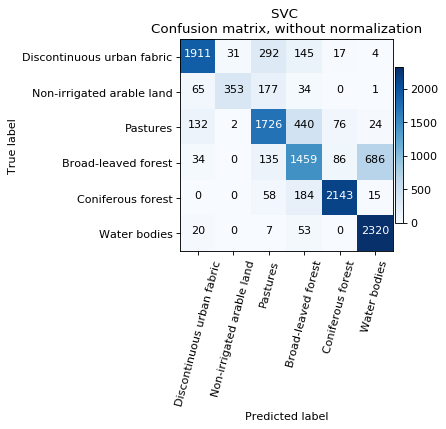

Normalized confusion matrix
[[7.96e-01 1.29e-02 1.22e-01 6.04e-02 7.08e-03 1.67e-03]
 [1.03e-01 5.60e-01 2.81e-01 5.40e-02 0.00e+00 1.59e-03]
 [5.50e-02 8.33e-04 7.19e-01 1.83e-01 3.17e-02 1.00e-02]
 [1.42e-02 0.00e+00 5.63e-02 6.08e-01 3.58e-02 2.86e-01]
 [0.00e+00 0.00e+00 2.42e-02 7.67e-02 8.93e-01 6.25e-03]
 [8.33e-03 0.00e+00 2.92e-03 2.21e-02 0.00e+00 9.67e-01]]


<Figure size 432x288 with 0 Axes>

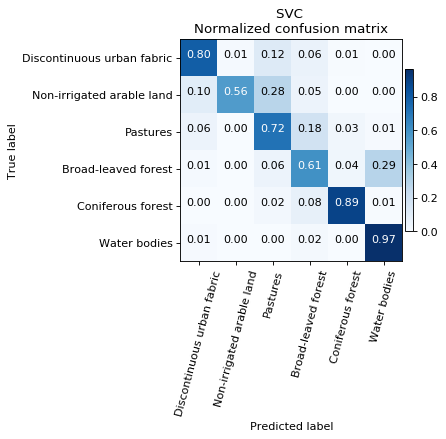

In [192]:
##################################################################
print(X_TEST.shape)
print(PREDICTED.shape )
y_test, predicted = y_TEST, PREDICTED

from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, predicted
confusion_matrix(y_true, y_pred)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
###################################################################
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization') 
    print(cm) 
    
    size = 5.5
    from matplotlib.pyplot import figure ; 
    figsize = size
    
    figure(facecolor=(1,1,1), num=None,
           figsize=(figsize, figsize ), 
           dpi=80, )

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar() 
    plt.colorbar(  fraction=0.035, pad=0.01 ) 
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Clas     = []
for i in LColors  : 
    Clas.append(uf.LabelsList()[ i ])

print("Classes :", Clas, '\n')

# Plot non-normalized confusion matrix
plt.figure() 
plot_confusion_matrix(cnf_matrix, classes=Clas,
                      title=f'{str(CLF)[:3]} \nConfusion matrix, without normalization')
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=Clas, 
                      normalize=True,
                      title=f'{str(CLF)[:3]} \nNormalized confusion matrix')
plt.show() 


In [193]:
if cas == "train_validation" :

    nc = len(LColors) # Number of Classes

    # iterate over test data 
    s = 0 
    L_INDX  = [] 
    L_PXL   = [] 
    L_COORD = [] 
    L_PRED  = [] 
    for pred, target in zip(list(PREDICTED), list(y_TEST)) : 
        #print( "Target:", int(target), ", Pred:", int(pred), int(pred) == int(target) , "\t", a_dictionary[s]) #, "Data Nb:", s ) 
        #if (int(pred) != int(target) ) : 
        L_INDX.append(  a_dictionary[s][0] )      # 
        L_PXL.append(   a_dictionary[s][1] )      # 
        L_COORD.append( a_dictionary[s][3] )      # 
        L_PRED.append( [int(pred), int(target)] ) # 
        s+=1 
elif cas == "test":
    nc = len(LColors) # Number of Classes

    # iterate over test data 
    s = 0 
    L_INDX  = [] 
    L_PXL   = [] 
    L_COORD = [] 
    L_PRED  = [] 
    for pred, target in zip(list(PREDICTED), list(y_TEST)) : 
        #print( "Target:", int(target), ", Pred:", int(pred), int(pred) == int(target) , "\t", a_dictionary[s]) #, "Data Nb:", s ) 
        #if (int(pred) != int(target) ) : 
        L_INDX.append(  a_dictionary_ts[s][0] )      # 
        L_PXL.append(   a_dictionary_ts[s][1] )      # 
        L_COORD.append( a_dictionary_ts[s][3] )      # 
        L_PRED.append( [int(pred), int(target)] ) # 
        s+=1 


In [194]:
# 'false' predictions example
from IPython.display import Image, display
AnalyzedCol = 0 # Analyzed IndexOfColor
print( "INDX, PXL, COORD, PRED, TRGT" ) 
for i in range( len( L_INDX ) ) : 
    INDX, PXL, COORD, PRED, TRGT = L_INDX[i], L_PXL[i] , L_COORD[i], L_PRED[i][0], L_PRED[i][1] 
    if ( int(INDX) == AnalyzedCol )*( PRED!=TRGT ) : 
        print( INDX, PXL, COORD, PRED, TRGT ) 
        #display(Image( filename = f"/home/boudaose/23_mai/Label_{LColors[INDX] }/Context_500x500_{LColors[INDX]}/Context__Color{LColors[INDX]}_Pixel_Nb_{PXL}.png" )) 


INDX, PXL, COORD, PRED, TRGT
0 2401 [19665  9296] 1 0
0 2406 [20541  9296] 2 0
0 2407 [17370  9297] 4 0
0 2410 [20517  9297] 2 0
0 2417 [20553  9298] 3 0
0 2419 [19665  9299] 2 0
0 2426 [19385  9300] 2 0
0 2428 [19629  9301] 2 0
0 2430 [20526  9301] 2 0
0 2431 [20553  9301] 2 0
0 2442 [19629  9304] 3 0
0 2448 [19665  9305] 5 0
0 2457 [19629  9307] 3 0
0 2471 [19629  9310] 3 0
0 2473 [20521  9310] 2 0
0 2476 [20569  9310] 3 0
0 2480 [20482  9311] 2 0
0 2487 [19641  9313] 2 0
0 2491 [20569  9313] 2 0
0 2503 [19641  9316] 3 0
0 2504 [20513  9316] 1 0
0 2520 [20513  9319] 2 0
0 2525 [17317  9320] 4 0
0 2532 [20525  9320] 3 0
0 2533 [17341  9321] 2 0
0 2534 [17353  9321] 3 0
0 2538 [19386  9321] 3 0
0 2539 [20498  9321] 3 0
0 2549 [17317  9323] 4 0
0 2550 [17329  9323] 3 0
0 2557 [20522  9323] 3 0
0 2558 [17341  9324] 3 0
0 2559 [17353  9324] 3 0
0 2560 [19333  9324] 2 0
0 2563 [19386  9324] 2 0
0 2564 [20498  9324] 3 0
0 2565 [19345  9325] 1 0
0 2569 [20510  9325] 2 0
0 2570 [20534  9325] 

In [195]:
#CLC_Ran-Azi_16004_9004_Shapes_1600_6400.dat
Ran, Azi = 16004, 9004     # Top-Left of the General map. (Chambery)
RanSHP, AziSHP= 6400, 1600



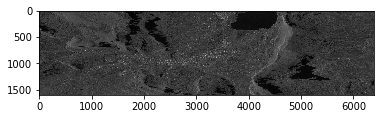

CPU times: user 940 ms, sys: 328 ms, total: 1.27 s
Wall time: 6.62 s


In [196]:
%%time

A, _, _ = uf.Complex_Imagt_BIL( C0=(Ran-Ran%100), L0=(Azi-Azi%100), 
                            Date='30211332', 
                            ImgtBIL= [RanSHP+0 , AziSHP+0 ]  , 
                            chemin='stack') 

plt.imshow(np.log(A), cmap='gray') 
plt.show() 

In [204]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image 

%matplotlib auto 
#---------------------------------------
AnalyzedCol = 0 # Analyzed IndexOfColor
#---------------------------------------
# Create figure and axes 
fig, ax = plt.subplots( figsize=(12,12) ) 
# Display the image 
ax.imshow( np.log(A) , cmap='gray' ) 

colors = [ 'r', 'y', 'g', 'b', 'c', 'm'] 
nbdata = 0 

for i in range( len( L_INDX ) ) : 
    INDX, PXL, COORD, PRED, TRGT = L_INDX[i], L_PXL[i] , L_COORD[i], L_PRED[i][0], L_PRED[i][1] 
    if ( int(INDX) == AnalyzedCol ) : #*( PRED!=TRGT ) : 
        nbdata+=1
        #print( INDX, PXL, COORD, PRED, TRGT , " : " , COORD[0] , COORD[1]) 
        rect = patches.Rectangle( ( (COORD[0]-(Ran-Ran%100) ) , COORD[1]-(Azi-Azi%100)+0 ), 
                                 12, 3, 
                                 linewidth=0.3, alpha=0.25, 
                                 edgecolor='none', facecolor=colors[PRED]) 
        # Add the patch to the Axes 
        ax.add_patch(rect) 

plt.title( f"{uf.LabelsList()[LColors[AnalyzedCol]]}" )
for i in range( len( LColors ) ) : 
    plt.plot( [10],[10], c=f'{colors[i]}', label=f'{uf.LabelsList()[LColors[i]]}',linewidth=5.0 ) 
    plt.legend() 
plt.grid()
plt.show() 
print( f"{uf.LabelsList()[LColors[AnalyzedCol]]}", "\t Nb Data :" , nbdata ) 


Using matplotlib backend: TkAgg
Discontinuous urban fabric 	 Nb Data : 2400


In [31]:
for i in range( len( LColors ) ) : 
    print(i, "\t", colors[i], "\t", uf.LabelsList()[LColors[i]]) 

0 	 r 	 Continuous urban fabric
1 	 y 	 Non-irrigated arable land
2 	 g 	 Pastures
3 	 b 	 Broad-leaved forest
4 	 c 	 Coniferous forest
5 	 m 	 Natural grasslands


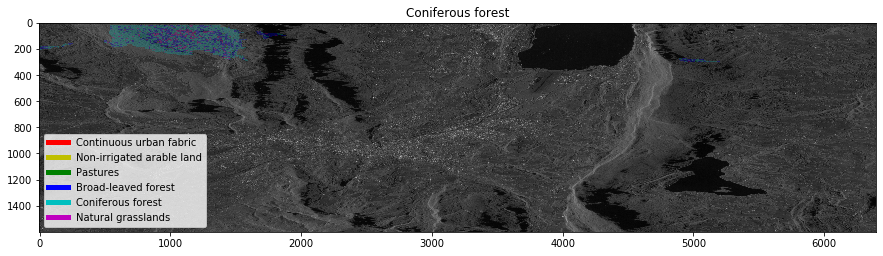

Coniferous forest 	 Nb Data : 6000


In [205]:
#pooling( mat=A, ksize=[1,4],  )
A41 = uf.pooling(mat=A, ksize=[1,4],method='mean',pad=False) 

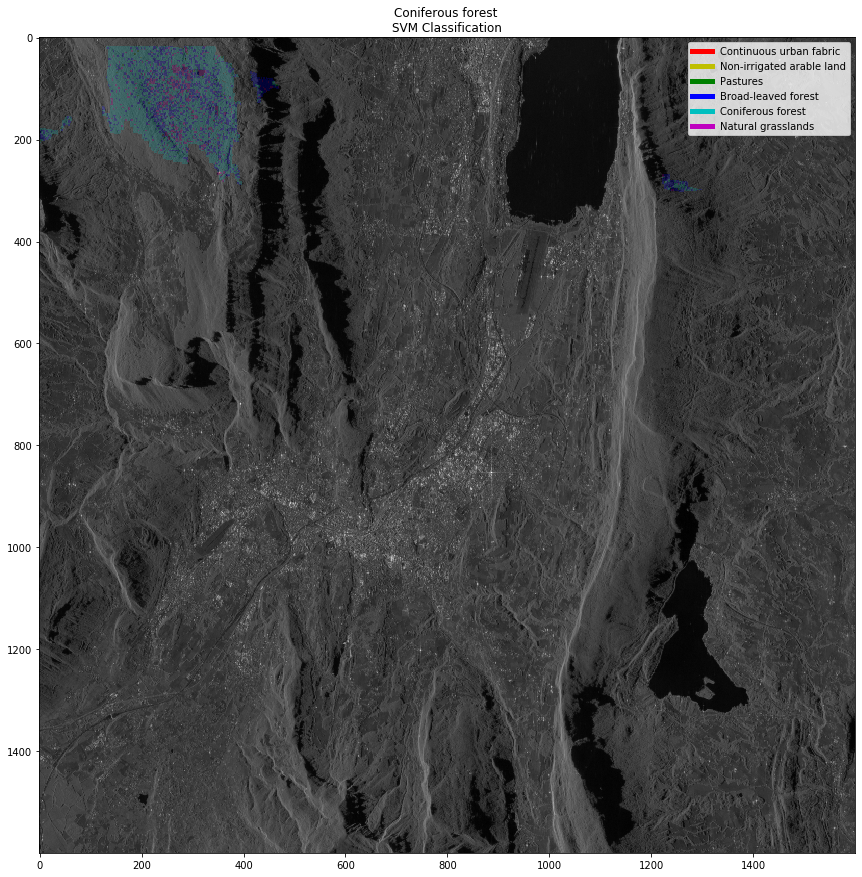

Coniferous forest 	 Nb Data : 6000
